In [28]:
from preprocessing import (
    load_dataset,
    get_feature_types,
    build_preprocessor,
    split_data,
    build_full_pipeline
)

from sklearn.linear_model import LogisticRegression

df = load_dataset("train.csv")
df.head()


,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [29]:
numerical_cols, categorical_cols = get_feature_types(df)



In [30]:
preprocessor = build_preprocessor(numerical_cols, categorical_cols)



In [31]:
X_train, X_test, y_train, y_test = split_data(df)

In [32]:
model = LogisticRegression(max_iter=500)
pipeline = build_full_pipeline(preprocessor, model)

In [33]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['policy_tenure',
                                                   'age_of_car',
                                                   'age_of_policyholder',
                                                   'population_density', 'make',
                                                   'airbags', 'displacement',
                                                   'cylinder', 'gear_box',
                                                   'turning_radius', 'length',
                                                   'width', 'height',
                                                   'gross_weight',
                                                   'ncap_rating']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['policy_id', 'are...
                                                   'transmission_type',
                                                   'steering_type',
                                                   'is_front_fog_lights',
                                                   'is_rear_window_wiper',
                                                   'is_rear_window_washer',
                                                   'is_rear_window_defogger',
                                                   'is_brake_assist',
                                                   'is_power_door_locks',
                                                   'is_central_locking',
                                                   'is_power_steering',
                                                   'is_driver_seat_height_adjustable',
                                                   'is_day_night_rear_view_mirror',
                                                   'is_ecw',
                                                   'is_speed_alert'])])),
                ('model', LogisticRegression(max_iter=500))])

In [34]:
print("Model Score:", pipeline.score(X_test, y_test))

Model Score: 0.9360013653042069


Accuracy: 0.9339534089939414

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     10969
           1       0.07      0.00      0.01       750

    accuracy                           0.93     11719
   macro avg       0.50      0.50      0.49     11719
weighted avg       0.88      0.93      0.90     11719



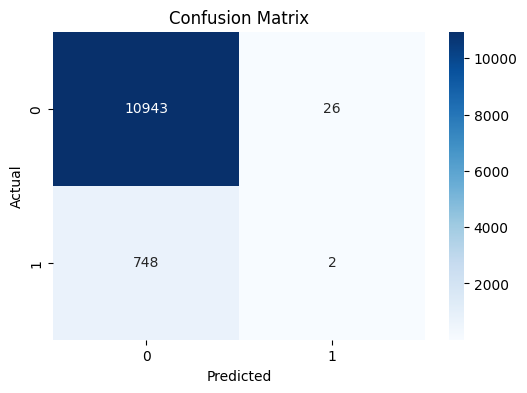

In [35]:
from preprocessing import (
    load_dataset,
    get_feature_types,
    build_preprocessor,
    split_data,
    build_full_pipeline
)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = load_dataset("train.csv")

# Split feature types
numerical_cols, categorical_cols = get_feature_types(df)

# Split train/test
X_train, X_test, y_train, y_test = split_data(df)

# Preprocessor
preprocessor = build_preprocessor(numerical_cols, categorical_cols)

# Balanced Logistic Regression
model = LogisticRegression(max_iter=2000, class_weight="balanced")

# Pipeline
pipeline = build_full_pipeline(preprocessor, model)

# Train model
pipeline.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)

# Score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



Training: Logistic Regression

Accuracy: 0.9340

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10969
           1       0.07      0.00      0.01       750

    accuracy                           0.93     11719
   macro avg       0.50      0.50      0.49     11719
weighted avg       0.88      0.93      0.90     11719



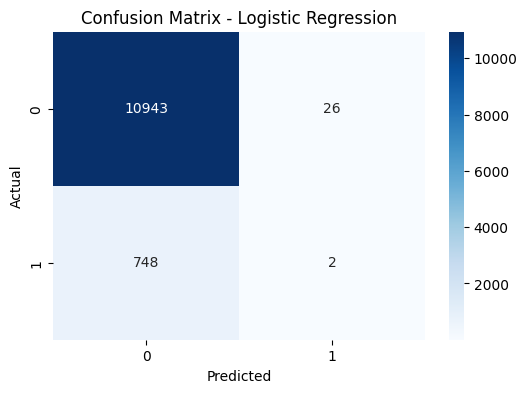


Training: Random Forest


In [ ]:
from preprocessing import (
    load_dataset,
    get_feature_types,
    build_preprocessor,
    split_data,
    build_full_pipeline
)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

# Optional Installed Models
try:
    from xgboost import XGBClassifier
    xgb_available = True
except:
    xgb_available = False

try:
    from lightgbm import LGBMClassifier
    lgbm_available = True
except:
    lgbm_available = False

try:
    from catboost import CatBoostClassifier
    cat_available = True
except:
    cat_available = False


# Load data
df = load_dataset("train.csv")

# Get feature types
numerical_cols, categorical_cols = get_feature_types(df)

# Split train/test
X_train, X_test, y_train, y_test = split_data(df)

# Preprocessor
preprocessor = build_preprocessor(numerical_cols, categorical_cols)

# Dictionary of models
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000, class_weight="balanced"),
    "Random Forest": RandomForestClassifier(n_estimators=300, class_weight="balanced"),
    "Gradient Boosting": GradientBoostingClassifier(),
    "KNN": KNeighborsClassifier(),
    "Linear SVC": LinearSVC()
}

if xgb_available:
    models["XGBoost"] = XGBClassifier(eval_metric='logloss')

if lgbm_available:
    models["LightGBM"] = LGBMClassifier()

if cat_available:
    models["CatBoost"] = CatBoostClassifier(verbose=0)


results = {}

# Train all models
for name, model in models.items():
    print(f"\n==============================")
    print(f"Training: {name}")
    print("==============================")

    pipeline = build_full_pipeline(preprocessor, model)
    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"\nAccuracy: {acc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Final Results Table
print("\n\n======== FINAL MODEL COMPARISON ========")
for name, acc in results.items():
    print(f"{name}: {acc:.4f}")


In [ ]:
import joblib

# Choose the best model (example: Random Forest)
best_model_name = max(results, key=results.get)
print("Best Model:", best_model_name)

# Rebuild best model pipeline
best_model = models[best_model_name]
best_pipeline = build_full_pipeline(preprocessor, best_model)
best_pipeline.fit(X_train, y_train)

# Save model
joblib.dump(best_pipeline, "final_model.pkl")
print("Model saved as final_model.pkl")


Best Model: Random Forest
Model saved as final_model.pkl


In [ ]:
# Load test.csv
df_test = load_dataset("test.csv")

# Preprocess
X_test_final = df_test.copy()

# Predict using saved best model
best_model = joblib.load("final_model.pkl")
test_pred = best_model.predict(X_test_final)

# Create submission file
import pandas as pd
submission = pd.DataFrame({
    "policy_id": df_test["policy_id"],
    "renewal": test_pred
})

submission.to_csv("submission.csv", index=False)
print("submission.csv saved!")


submission.csv saved!


In [1]:
# ======= ALL-IN-ONE training + evaluation cell =======
from preprocessing import load_dataset, get_feature_types, split_data, build_preprocessor, build_full_pipeline
from model_training import train_and_evaluate_all
from evaluation import plot_roc, plot_pr, get_feature_importances
from save_and_submit import save_model, make_submission
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Optional imports for display
import seaborn as sns
from sklearn.metrics import roc_auc_score

# 1) Load data
df = load_dataset("train.csv")
numerical_cols, categorical_cols = get_feature_types(df)

# 2) Split
X_train, X_test, y_train, y_test = split_data(df)

# 3) Train & evaluate all models (this will print metrics)
results, fitted = train_and_evaluate_all(X_train, X_test, y_train, y_test, numerical_cols, categorical_cols)

# 4) Show results table
results_df = pd.DataFrame(results).T
display(results_df)

# 5) Choose best by ROC-AUC (if available) or accuracy
best_model_name = None
best_score = -np.inf
for name, metrics in results.items():
    score = metrics.get('roc_auc') if not np.isnan(metrics.get('roc_auc', np.nan)) else metrics.get('accuracy', 0)
    if score is None:
        score = 0
    if score > best_score:
        best_score = score
        best_model_name = name

print("Selected best:", best_model_name, "score:", best_score)

best_pipeline = fitted[best_model_name]

# 6) Detailed evaluation of best model: ROC and PR (if probabilities)
try:
    y_proba = best_pipeline.predict_proba(X_test)[:,1]
    auc_val = plot_roc(y_test, y_proba, title=f"ROC - {best_model_name}")
    pr_auc = plot_pr(y_test, y_proba, title=f"PR - {best_model_name}")
    print("ROC AUC:", auc_val, "PR AUC:", pr_auc)
except Exception as e:
    print("No predict_proba available for this model:", e)

# 7) Feature importances (if supported)
try:
    feat_imp = get_feature_importances(best_pipeline, numerical_cols, categorical_cols, top_n=30)
    print("Top features:\n", feat_imp.head(20))
    feat_imp.head(30).plot.bar(figsize=(10,6))
    plt.title("Top Feature Importances")
    plt.show()
except Exception as e:
    print("Feature importance not available for this model:", e)

# 8) Save best pipeline
save_model(best_pipeline, path="models/final_pipeline.joblib")

# 9) Create submission (adjust id column if needed)
make_submission(best_pipeline, test_csv="test.csv", id_col="policy_id", output="submission.csv")
print("All done. submission.csv created.")



--- Training Logistic Regression ---
Logistic Regression metrics: {'accuracy': 0.9339534089939414, 'precision': 0.07142857142857142, 'recall': 0.0026666666666666666, 'f1': 0.005141388174807198, 'roc_auc': np.float64(0.5858167563132464), 'log_loss': 0.38682784500558226}

--- Training Random Forest ---
Random Forest metrics: {'accuracy': 0.9360013653042069, 'precision': 0.0, 'recall': 0.0, 'f1': 0.0, 'roc_auc': np.float64(0.6077528185492449), 'log_loss': 0.2933892626781263}

--- Training Gradient Boosting ---
Gradient Boosting metrics: {'accuracy': 0.9360013653042069, 'precision': 0.0, 'recall': 0.0, 'f1': 0.0, 'roc_auc': np.float64(0.6480443066824688), 'log_loss': 0.22949484409952595}

--- Training KNN ---
KNN metrics: {'accuracy': 0.9336120829422305, 'precision': 0.0625, 'recall': 0.0026666666666666666, 'f1': 0.005115089514066497, 'roc_auc': np.float64(0.5295248427386272), 'log_loss': 1.6627241735624319}

--- Training Linear SVC ---
Linear SVC metrics: {'accuracy': 0.9360013653042069,

c:\Users\Lenovo\Desktop\car_insurance_project\venv\lib\site-packages\IPython\core\formatters.py:344: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,accuracy,precision,recall,f1,roc_auc,log_loss
Logistic Regression,0.933953,0.071429,0.002667,0.005141,0.585817,0.386828
Random Forest,0.936001,0.000000,0.000000,0.000000,0.607753,0.293389
Gradient Boosting,0.936001,0.000000,0.000000,0.000000,0.648044,0.229495
KNN,0.933612,0.062500,0.002667,0.005115,0.529525,1.662724
Linear SVC,0.936001,0.000000,0.000000,0.000000,NaN,NaN


Selected best: Linear SVC score: 0.9360013653042069
No predict_proba available for this model: This 'Pipeline' has no attribute 'predict_proba'
Feature importance not available for this model: Length of values (47000) does not match length of index (43)
Saved pipeline to models/final_pipeline.joblib
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\Lenovo\Desktop\car_insurance_project\venv\lib\site-packages\IPython\core\interactiveshell.py", line 3550, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8912\2179532782.py", line 66, in <module>
    make_submission(best_pipeline, test_csv="test.csv", id_col="policy_id", output="submission.csv")
  File "c:\Users\Lenovo\Desktop\car_insurance_project\save_and_submit.py", line 29, in make_submission
    submission.to_csv(output, index=False)
  File "c:\Users\Lenovo\Desktop\car_insurance_project\venv\lib\site-packages\pandas\util\_decorators.py", line 333, in wrapper
    return func(*args, **kwargs)
  File "c:\Users\Lenovo\Desktop\car_insurance_project\venv\lib\site-packages\pandas\core\generic.py", line 3989, in to_csv
    --------
  File "c:\Users\Lenovo\Desktop\car_insurance_project\venv\lib\site-packages\pandas\io\formats\format.py", line 995, in to_csv
  File "c:\

In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, log_loss, roc_curve, precision_recall_curve
)

# Predictions (probabilities required)
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba))

try:
    print("Log Loss:", log_loss(y_test, y_pred_proba))
except:
    print("Log Loss cannot be computed.")


Accuracy: 0.9360013653042069
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC-AUC: 0.6196512596104173
Log Loss: 0.2983460255708924


c:\Users\Lenovo\Desktop\car_insurance_project\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


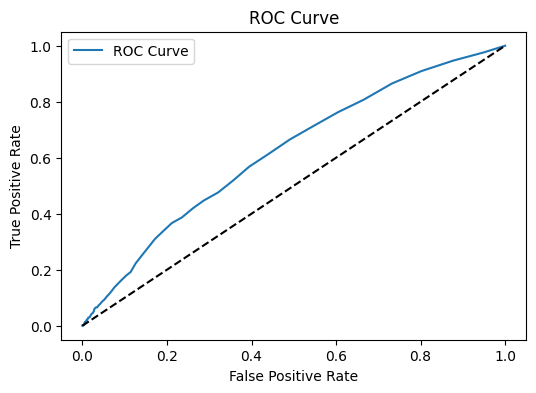

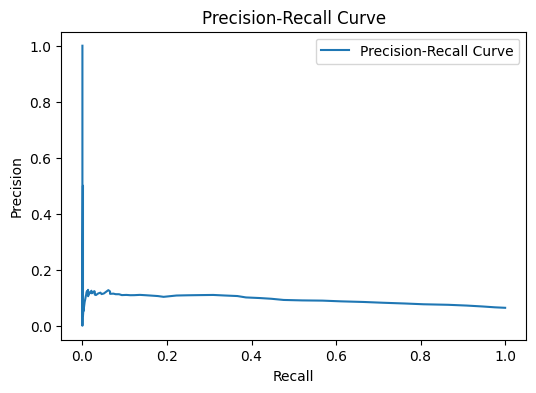

In [ ]:
    # ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Precision Recall Curve
prec, rec, _ = precision_recall_curve(y_test, y_pred_proba)

plt.figure(figsize=(6,4))
plt.plot(rec, prec, label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()


In [ ]:
# === FEATURE IMPORTANCE FOR RANDOM FOREST ===
import pandas as pd
import numpy as np

# Access parts of the trained pipeline
preprocess = best_pipeline.named_steps["preprocess"]
model = best_pipeline.named_steps["model"]

# --- 1. Extract numerical and categorical names ---
numeric_features = preprocess.transformers_[0][2]   # names of numerical columns
categorical_encoder = preprocess.transformers_[1][1]  # OneHotEncoder
categorical_features = list(categorical_encoder.get_feature_names_out())

# Combine all feature names after preprocessing
all_features = list(numeric_features) + categorical_features

# --- 2. Get Feature Importances from Random Forest ---
try:
    importances = model.feature_importances_

    fi = pd.DataFrame({
        "Feature": all_features,
        "Importance": importances
    }).sort_values(by="Importance", ascending=False)

    print("\nTop 20 Features:")
    display(fi.head(20))

except:
    print("❌ This model does NOT support feature importances.")



Top 20 Features:


,Feature,Importance
0,policy_tenure,0.110627
2,age_of_policyholder,0.078133
1,age_of_car,0.074160
3,population_density,0.017002
46908,area_cluster_C8,0.004140
46899,area_cluster_C2,0.003674
46905,area_cluster_C5,0.003282
46903,area_cluster_C3,0.003257
46893,area_cluster_C14,0.003054
46909,area_cluster_C9,0.002935


In [26]:
from sklearn.model_selection import GridSearchCV

# We tune the best model: Random Forest
param_grid = {
    "model__n_estimators": [200, 300],
    "model__max_depth": [10, 20, None],
    "model__min_samples_split": [2, 5],
}

pipeline_rf = build_full_pipeline(preprocessor, RandomForestClassifier(class_weight="balanced"))

grid = GridSearchCV(
    estimator=pipeline_rf,
    param_grid=param_grid,
    cv=3,
    scoring="roc_auc",
    n_jobs=-1,
    verbose=2
)

grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best ROC-AUC:", grid.best_score_)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters: {'model__max_depth': 20, 'model__min_samples_split': 5, 'model__n_estimators': 200}
Best ROC-AUC: 0.6069764253826476


In [ ]:

best_model = grid.best_estimator_.named_steps["model"]
importances = best_model.feature_importances_

fi = pd.DataFrame({
    "Feature": all_features,
    "Importance": importances
}).sort_values("Importance", ascending=False)

display(fi.head(20))
def get_feature_names_from_column_transformer(ct):
    feature_names = []

    for name, trans, cols in ct.transformers_:
        if name == 'remainder':
            continue

        # If transformer supports get_feature_names_out
        if hasattr(trans, 'get_feature_names_out'):
            try:
                names = trans.get_feature_names_out(cols)
            except Exception:
                # If transformer is a Pipeline
                last_step = list(trans.named_steps.keys())[-1]
                names = trans.named_steps[last_step].get_feature_names_out(cols)
        else:
            names = cols

        feature_names.extend(list(names))

    return feature_names


# ---- USE IT ----
preprocess = best_pipeline.named_steps['preprocess']     # your ColumnTransformer
all_features = get_feature_names_from_column_transformer(preprocess)

model = best_pipeline.named_steps['model']
importances = model.feature_importances_

fi_df = pd.DataFrame({
    'feature': all_features,
    'importance': importances
}).sort_values('importance', ascending=False)

display(fi_df.head(20))
def get_feature_names_from_column_transformer(ct):
    feature_names = []

    for name, trans, cols in ct.transformers_:
        if name == 'remainder':
            continue

        # If transformer supports get_feature_names_out
        if hasattr(trans, 'get_feature_names_out'):
            try:
                names = trans.get_feature_names_out(cols)
            except Exception:
                # If transformer is a Pipeline
                last_step = list(trans.named_steps.keys())[-1]
                names = trans.named_steps[last_step].get_feature_names_out(cols)
        else:
            names = cols

        feature_names.extend(list(names))

    return feature_names


# ---- USE IT ----
preprocess = best_pipeline.named_steps['preprocess']     # your ColumnTransformer
all_features = get_feature_names_from_column_transformer(preprocess)

model = best_pipeline.named_steps['model']
importances = model.feature_importances_

fi_df = pd.DataFrame({
    'feature': all_features,
    'importance': importances
}).sort_values('importance', ascending=False)

display(fi_df.head(20))
def get_feature_names_from_column_transformer(ct):
    feature_names = []

    for name, trans, cols in ct.transformers_:
        if name == 'remainder':
            continue

        # If transformer supports get_feature_names_out
        if hasattr(trans, 'get_feature_names_out'):
            try:
                names = trans.get_feature_names_out(cols)
            except Exception:
                # If transformer is a Pipeline
                last_step = list(trans.named_steps.keys())[-1]
                names = trans.named_steps[last_step].get_feature_names_out(cols)
        else:
            names = cols

        feature_names.extend(list(names))

    return feature_names


# ---- USE IT ----
preprocess = best_pipeline.named_steps['preprocess']     # your ColumnTransformer
all_features = get_feature_names_from_column_transformer(preprocess)

model = best_pipeline.named_steps['model']
importances = model.feature_importances_

fi_df = pd.DataFrame({
    'feature': all_features,
    'importance': importances
}).sort_values('importance', ascending=False)

display(fi_df.head(20))



,Feature,Importance
0,policy_tenure,0.067974
1,age_of_car,0.035141
2,age_of_policyholder,0.022847
3,population_density,0.010784
46889,area_cluster_C10,0.007444
6,displacement,0.006226
46907,area_cluster_C7,0.004401
12,height,0.004335
46903,area_cluster_C3,0.004198
11,width,0.004121


In [ ]:
def get_feature_names_from_column_transformer(ct):
    feature_names = []

    for name, trans, cols in ct.transformers_:
        if name == 'remainder':
            continue

        # If transformer supports get_feature_names_out
        if hasattr(trans, 'get_feature_names_out'):
            try:
                names = trans.get_feature_names_out(cols)
            except Exception:
                # If transformer is a Pipeline
                last_step = list(trans.named_steps.keys())[-1]
                names = trans.named_steps[last_step].get_feature_names_out(cols)
        else:
            names = cols

        feature_names.extend(list(names))

    return feature_names


# ---- USE IT ----
preprocess = best_pipeline.named_steps['preprocess']     # your ColumnTransformer
all_features = get_feature_names_from_column_transformer(preprocess)

model = best_pipeline.named_steps['model']
importances = model.feature_importances_

fi_df = pd.DataFrame({
    'feature': all_features,
    'importance': importances
}).sort_values('importance', ascending=False)

display(fi_df.head(20))




Training: Logistic Regression

Accuracy: 0.9340

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10969
           1       0.07      0.00      0.01       750

    accuracy                           0.93     11719
   macro avg       0.50      0.50      0.49     11719
weighted avg       0.88      0.93      0.90     11719



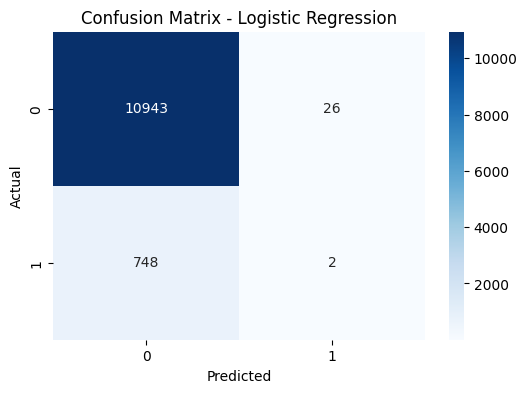


Training: Random Forest

Accuracy: 0.9360

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10969
           1       0.00      0.00      0.00       750

    accuracy                           0.94     11719
   macro avg       0.47      0.50      0.48     11719
weighted avg       0.88      0.94      0.91     11719



c:\Users\Lenovo\Desktop\car_insurance_project\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lenovo\Desktop\car_insurance_project\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lenovo\Desktop\car_insurance_project\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

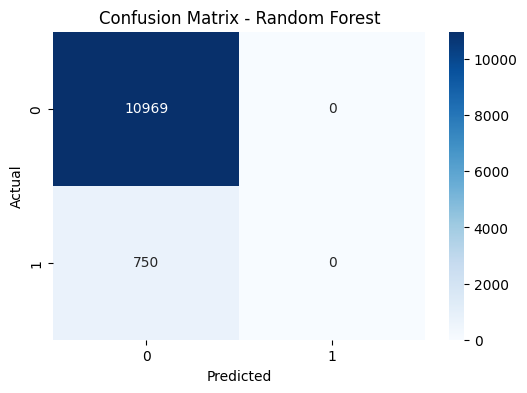


Training: Gradient Boosting

Accuracy: 0.9360

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10969
           1       0.00      0.00      0.00       750

    accuracy                           0.94     11719
   macro avg       0.47      0.50      0.48     11719
weighted avg       0.88      0.94      0.91     11719



c:\Users\Lenovo\Desktop\car_insurance_project\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lenovo\Desktop\car_insurance_project\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lenovo\Desktop\car_insurance_project\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

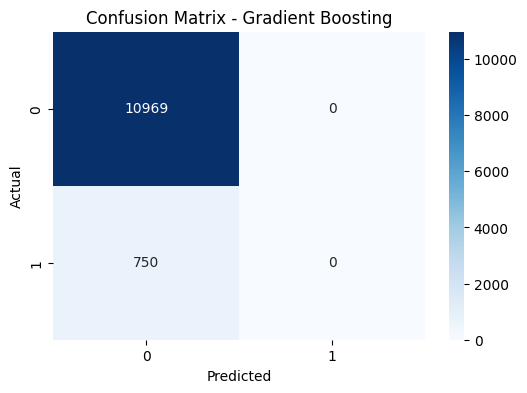


Training: KNN

Accuracy: 0.9336

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10969
           1       0.06      0.00      0.01       750

    accuracy                           0.93     11719
   macro avg       0.50      0.50      0.49     11719
weighted avg       0.88      0.93      0.90     11719



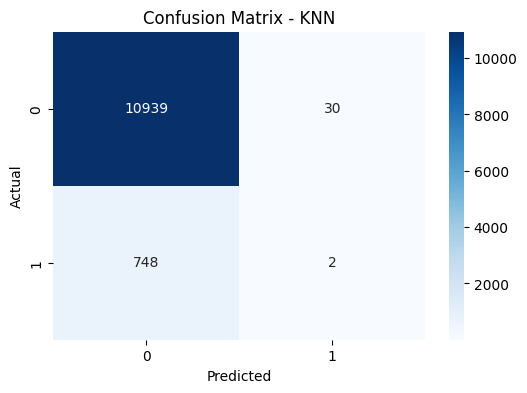


Training: Linear SVC

Accuracy: 0.9360

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10969
           1       0.00      0.00      0.00       750

    accuracy                           0.94     11719
   macro avg       0.47      0.50      0.48     11719
weighted avg       0.88      0.94      0.91     11719



c:\Users\Lenovo\Desktop\car_insurance_project\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lenovo\Desktop\car_insurance_project\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lenovo\Desktop\car_insurance_project\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

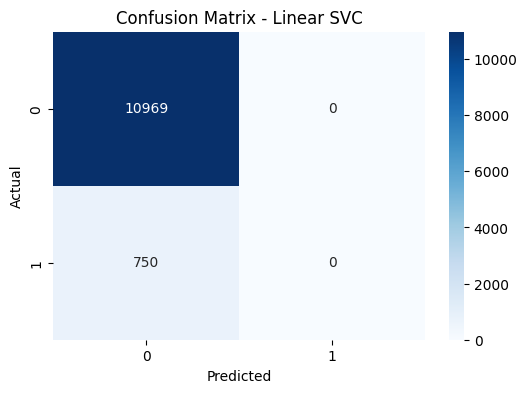



======== FINAL MODEL COMPARISON ========
Logistic Regression: 0.9340
Random Forest: 0.9360
Gradient Boosting: 0.9360
KNN: 0.9336
Linear SVC: 0.9360


In [ ]:
from preprocessing import (
    load_dataset,
    get_feature_types,
    build_preprocessor,
    split_data,
    build_full_pipeline
)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

# Optional Installed Models
try:
    from xgboost import XGBClassifier
    xgb_available = True
except:
    xgb_available = False

try:
    from lightgbm import LGBMClassifier
    lgbm_available = True
except:
    lgbm_available = False

try:
    from catboost import CatBoostClassifier
    cat_available = True
except:
    cat_available = False


# Load data
df = load_dataset("train.csv")

# Get feature types
numerical_cols, categorical_cols = get_feature_types(df)

# Split train/test
X_train, X_test, y_train, y_test = split_data(df)

# Preprocessor
preprocessor = build_preprocessor(numerical_cols, categorical_cols)

# Dictionary of models
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000, class_weight="balanced"),
    "Random Forest": RandomForestClassifier(n_estimators=300, class_weight="balanced"),
    "Gradient Boosting": GradientBoostingClassifier(),
    "KNN": KNeighborsClassifier(),
    "Linear SVC": LinearSVC()
}

if xgb_available:
    models["XGBoost"] = XGBClassifier(eval_metric='logloss')

if lgbm_available:
    models["LightGBM"] = LGBMClassifier()

if cat_available:
    models["CatBoost"] = CatBoostClassifier(verbose=0)


results = {}

# Train all models
for name, model in models.items():
    print(f"\n==============================")
    print(f"Training: {name}")
    print("==============================")

    pipeline = build_full_pipeline(preprocessor, model)
    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"\nAccuracy: {acc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Final Results Table
print("\n\n======== FINAL MODEL COMPARISON ========")
for name, acc in results.items():
    print(f"{name}: {acc:.4f}")


In [ ]:
# Final Report
- Business Problem
- Dataset Info
- EDA Summary
- Preprocessing Summary
- Model Comparison Table
- ROC, PR plots
- Feature Importance
- Final Model Choice
- Limitations
- Future Improvements